In [1]:
from Wavelet_Fast import *

import numpy as np
import matplotlib
from scipy import  fft
from astropy.io import fits

Data batch scale analysis of NGC 1569:

In [4]:
names=['NGC1569_U','NGC1569_B','NGC1569_V','NGC1569_fcut','NGC1569_hmrms']
paths=['n1569u.fit','n1569b.fit','n1569v.fit','n1569fcut.fit','n1569hmrms.fits']
scales=[[2,60,1],[2,60,1],[2,60,1],[2,60,0.67],[2,60,2]]
scale_types=["triplet","triplet","triplet","triplet","triplet","triplet"]
pixel_scales=[1.134,1.134,1.134,1.5,0.487]
color=[]
distance=3360000
crop = [[[600,1400],[600,1400]],[[600,1400],[600,1400]],[[600,1400],[600,1400]],[[300,500],[300,500]],[[150,698],[0,548]]]

Commencing the wavelet scale analysis of NGC1569_U
|████████████████████████████████████████| 60/60 [100%] in 2:58.4 (0.34/s) 
Wavelet scale analysis of NGC1569_U has finished.
Commencing the wavelet scale analysis of NGC1569_B
|████████████████████████████████████████| 60/60 [100%] in 2:54.1 (0.34/s) 
Wavelet scale analysis of NGC1569_B has finished.
Commencing the wavelet scale analysis of NGC1569_V
|████████████████████████████████████████| 60/60 [100%] in 2:55.0 (0.34/s) 
Wavelet scale analysis of NGC1569_V has finished.
Commencing the wavelet scale analysis of NGC1569_fcut
|████████████████████████████████████████| 60/60 [100%] in 11.0s (5.45/s) 
Wavelet scale analysis of NGC1569_fcut has finished.
Commencing the wavelet scale analysis of NGC1569_hmrms
|████████████████████████████████████████| 60/60 [100%] in 1:22.6 (0.73/s) 
Wavelet scale analysis of NGC1569_hmrms has finished.


<Figure size 640x480 with 0 Axes>

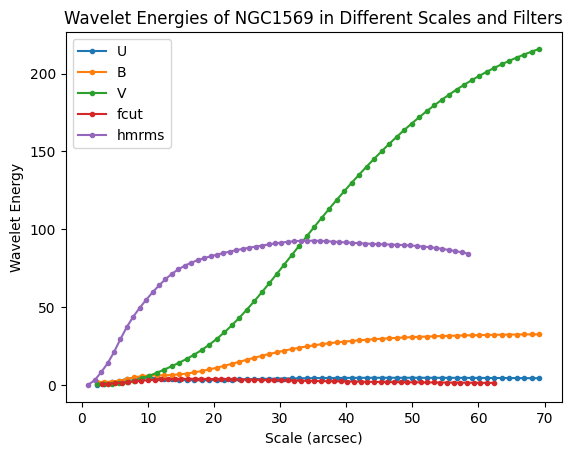

In [5]:
data_batch_energy_plot(paths,names,scales,pixel_scales,distance,scale_types,crop,'arcsec',colors=color)